# MSDS 400 Continuous Probability

In [1]:
from numpy import random, arange, array, swapaxes
import matplotlib.pyplot as plt

In [2]:
nsamples = 100
sample = random.random(nsamples)  # This draws a random sample.

nbins = 10  # This defines the number of subintervals for the histogram.
bns = float(nbins)
bns

10.0

For a uniform distribution, the proportions in each subinterval are expected to be the same.  With ten subintervals, this amounts to 0.1 in each.  With 20 subintervals it amounts to 0.05.

In [3]:
expected = 1.0 / bns  # This defines the expected subinterval proportion.

ind = arange(nbins)  # This sets ind to serve as a range of indices.
h = [0] * nbins  # This prepares h to serve as a list of the proper length.
histogram = {}  # This defines histogram as a void dictionary.

for k in ind:
    histogram[k] = 0  # This initializes the dictionary with zero counts.
histogram

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In the for loop we run v across all randomly generated values and categorize them according to which bin they fall in.  The count for each bin is accumulated in the dictionary histogram[&nbsp;] indexed according to ind[&nbsp;].

In [4]:
for v in sample:
    for k in ind:
        xk = float(k)
        if xk / bns <= v < (xk + 1) / bns:
            histogram[k] += 1
histogram

{0: 11, 1: 12, 2: 13, 3: 5, 4: 12, 5: 13, 6: 9, 7: 8, 8: 9, 9: 8}

The following for loop converts each count to a proportion and stores the proportions in the list h[&nbsp;] and the dictionary histogram[&nbsp;].  The list h[&nbsp;] will be used for plotting and the dictionary histogram[&nbsp;] for computing.

In [5]:
for k in ind:
    x = histogram[k]
    x = x / float(nsamples)
    h[k] = [x]
    histogram[k] = x
histogram

{0: 0.11,
 1: 0.12,
 2: 0.13,
 3: 0.05,
 4: 0.12,
 5: 0.13,
 6: 0.09,
 7: 0.08,
 8: 0.09,
 9: 0.08}

Measuring the degree of convergence of the histogram to the limiting uniform distribution can be done in various ways.  Here we use the sum of absolute differences between the expected proportion and the observed proportion.

Sum of Absolute Differences= 2.2000e-01


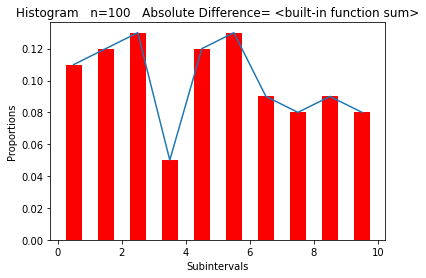

In [6]:
total = 0.0
for k in ind:
    total = total + abs(expected - histogram[k])
total = format(total, '0.4e')
print('Sum of Absolute Differences= {}'.format(total))

h = swapaxes(h, 0, 1)[0]  # Swapping x/y axes for pyplot
cell = ind + 0.5  # This will center the bar in the middle of the subinterval.
plt.figure()
plt.bar(cell, h, width=0.5, align='center', color='r')
plt.plot(cell, h)

# The following statements are used to form the title for the plot.
# Note how computational information is being included in the title.

string = str(nsamples) + '   Absolute Difference= ' + str(sum)
plt.title('Histogram   n=' + string)

plt.ylabel('Proportions')
plt.xlabel('Subintervals')
plt.show()